In [55]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import optimize
from functools import partial


In [56]:
data = """
7031	-4.4	-3.4	-2.4	-1.5	-0.5	0.3	1.3	2.2	3.2	4.2	5.2
7050	-2.9	-1.9	-1	0	0.8	1.7	2.7	3.6	4.6	5.6	6.6
8123	-3.9	-3	-2.1	-1.1	-0.1	0.7	1.7	2.6	3.6	4.5	5.5
7839	-2.3	-1.3	-0.4	0.5	1.5	2.4	3.3	4.3	5.3	6.2	7.4
8005	3.4	4.4	5.3	6.3	7.3	8.2	9.2	10.1	11.1	12.1	13.1
8307	-0.9	0	1	2	2.9	3.8	4.8	5.7	6.7	7.7	8.7
7882	1	2	2.9	3.8	4.8	5.6	6.6	7.6	8.5	9.4	10.4
7640	0.2	1.2	2.1	3.1	4	4.9	5.9	6.8	7.8	8.7	9.8
7400	0.8	1.7	2.7	3.6	4.6	5.5	6.4	7.4	8.4	9.3	10.4
8511	0.4	1.3	2.3	3.3	4.2	5.1	6.1	7.1	8	9	9.9
7859	-2.7	-1.8	-0.8	0.1	1.1	1.9	2.9	3.8	4.8	5.7	6.8
7806	-3.3	-2.4	-1.4	-0.4	0.4	1.4	2.3	3.3	4.3	5.2	6.3
7259	-2.6	-1.6	-0.7	0.2	1.2	2	3	3.9	4.9	5.8	6.8
7261	-3.2	-2.3	-1.3	-0.3	0.6	1.5	2.5	3.4	4.4	5.4	6.4
3846	2.1	3.1	4	5	6	6.9	7.9	8.8	9.8	10.8	11.8
7829	-1	0	0.8	1.8	2.8	3.7	4.7	5.6	6.6	7.5	8.5
8188	0	1	2	3	3.9	4.8	5.8	6.8	7.8	8.7	9.8
7528	1.5	2.4	3.4	4.4	5.3	6.2	7.2	8.2	9.1	10	11.1
7256	-0.2	0.7	1.7	2.6	3.6	4.6	5.5	6.5	7.5	8.4	9.5
4172	-0.4	0.6	1.5	2.5	3.5	4.4	5.4	6.4	7.4	8.4	9.4
3012	2.6	3.6	4.5	5.5	6.4	7.3	8.3	9.2	10.2	11.1	11.9
2683	2.4	3.3	4.3	5.3	6.2	7.1	8.1	9	10	10.9	11.9
1837	-2.4	-1.4	-0.4	0.4	1.4	2.3	3.2	4.2	5.1	6.1	7.1
2979	2.2	3.2	4.1	5	6	6.8	7.8	8.7	9.7	10.6	11.7
5486	-3.4	-2.5	-1.6	-0.7	0.2	1.1	2	2.9	3.8	4.8	5.8
3186	-1.8	-0.9	0	1	1.9	2.8	3.7	4.7	5.6	6.6	7.5
2123	-0.8	0.1	1.1	2	3	3.9	4.8	5.8	6.8	7.7	8.8
3690	-1.7	-0.7	0.1	1.1	2.1	2.9	3.9	4.8	5.8	6.8	7.8
3469	0.1	1.1	2	3	4	4.8	5.8	6.7	7.6	8.6	9.6
5488	-1.6	-0.7	0.1	1.1	2	2.9	3.8	4.7	5.7	6.6	7.6
3560	3.1	4	5	5.9	6.9	7.7	8.7	9.6	10.6	11.5	12.6
4737	-2.2	-1.2	-0.3	0.6	1.6	2.4	3.4	4.3	5.3	6.2	7.3
1443	2.8	3.7	4.6	5.6	6.5	7.4	8.4	9.3	10.2	11.2	12.2
2637	-2.7	-1.7	-0.8	0.1	1.1	2	3	3.9	4.9	5.9	6.9
1453	2.7	3.6	4.6	5.5	6.5	7.4	8.3	9.2	10.2	11.1	12.1
3493	0	0.9	1.9	2.8	3.8	4.7	5.7	6.6	7.6	8.5	9.6
4122	-0.5	0.4	1.4	2.3	3.3	4.1	5.1	6	7	7.9	9.1
2086	0.1	1.1	2	2.9	3.9	4.8	5.7	6.6	7.6	8.5	9.5
2300	1.3	2.2	3.2	4.2	5.2	6.1	7	8	9	10	10.9
3183	-0.7	0.1	1.1	2.1	3.1	3.9	4.9	5.8	6.8	7.8	8.7
3439	-2.2	-1.3	-0.3	0.6	1.6	2.4	3.4	4.4	5.3	6.3	7.3
4687	-3.9	-2.9	-2	-1	-0.1	0.7	1.7	2.8	3.7	4.7	5.6
5116	-3	-2	-1.1	-0.1	0.8	1.7	2.7	3.6	4.6	5.6	6.6
3042	2.1	3.1	4	5	5.9	6.9	7.9	8.7	9.6	10.6	11.7
4410	-3.3	-2.3	-1.4	-0.4	0.5	1.4	2.4	3.3	4.3	5.2	6.3
3532	-1.8	-0.8	0.1	1.1	2.1	2.9	3.9	4.8	5.8	6.8	7.7
4710	0.2	1.2	2.1	3.1	4.1	5	5.9	6.9	7.8	8.8	9.8
4501	1.2	2.1	3.1	4.1	5	6	6.9	7.9	8.8	9.8	10.8
3037	1.2	2.1	3.1	4	5	5.9	6.9	7.9	8.8	9.8	10.8
4518	-0.5	0.3	1.3	2.3	3.2	4.1	5.1	6	7	7.9	9
3665	-2.6	-1.7	-0.7	0.2	1.2	2.1	3	4	4.9	5.9	6.9
3374	2.6	3.5	4.5	5.4	6.4	7.3	8.3	9.2	10.2	11.2	12.2
4296	-2.6	-1.7	-0.7	0.1	1.1	1.9	2.9	3.8	4.8	5.7	6.7
4434	-2.3	-1.4	-0.4	0.4	1.4	2.3	3.2	4.2	5.1	6.1	7.2
4288	-2.5	-1.5	-0.6	0.3	1.3	2.2	3.2	4.1	5	6	7
4732	-1.7	-0.8	0.1	1	2	2.9	3.9	4.8	5.8	6.7	7.8
3740	0.5	1.4	2.4	3.3	4.3	5.2	6.1	7.1	8	9	10
5093	1.7	2.6	3.6	4.5	5.5	6.3	7.3	8.2	9.1	10.1	11.1
4787	1.4	2.3	3.3	4.2	5.2	6	7	7.9	8.9	9.8	10.8
3638	-0.6	0.2	1.2	2.1	3.1	4	4.9	5.9	6.8	7.7	8.8
4308	-2.2	-1.2	-0.3	0.6	1.6	2.5	3.4	4.4	5.3	6.3	7.3
3737	-2.9	-1.9	-1	0	0.8	1.7	2.7	3.6	4.6	5.5	6.5
4977	-2.5	-1.6	-0.6	0.3	1.3	2.1	3.1	4	5	5.9	7
3609	2.3	3.2	4.2	5.1	6.1	7	7.9	8.9	9.8	10.8	11.9
2345	3.1	4	5	5.9	6.9	7.8	8.8	9.8	10.8	11.8	12.8
3854	0.4	1.4	2.3	3.3	4.2	5.1	6.1	7.1	8	9	10
3454	-0.5	0.4	1.4	2.3	3.3	4.2	5.1	6.1	7	8	9
3908	0.4	1.3	2.3	3.2	4.2	5.1	6	6.9	7.9	8.9	9.9
2910	-0.1	0.8	1.8	2.8	3.8	4.7	5.7	6.6	7.6	8.6	9.6
3357	0.1	1	2	3	3.9	4.8	5.8	6.8	7.7	8.7	9.7
3418	-2.3	-1.3	-0.3	0.6	1.6	2.6	3.6	4.6	5.7	6.7	7.5
3465	2.8	3.8	4.7	5.7	6.7	7.6	8.5	9.5	10.5	11.4	12.4
5502	2.3	3.2	4.2	5.1	6.1	7	8	8.9	9.8	10.9	12
2571	2.5	3.5	4.4	5.4	6.4	7.3	8.3	9.3	10.3	11.3	12.3
3591	2.5	3.5	4.4	5.4	6.4	7.3	8.3	9.3	10.3	11.3	12.2
1862	0	1	2	3	4	5	6	7.1	8.1	9.1	10.2
2196	0.6	1.6	2.5	3.5	4.5	5.3	6.3	7.3	8.2	9.2	10.3
5498	0.5	1.5	2.5	3.5	4.5	5.4	6.4	7.4	8.4	9.4	10.4
3021	0.9	1.9	2.8	3.8	4.8	5.8	6.8	7.8	8.9	9.8	11
3147	1.7	2.6	3.6	4.6	5.6	6.5	7.5	8.4	9.5	10.5	11.4
5316	2.2	3.2	4.2	5.1	6.1	7	8	8.9	9.9	10.9	11.9
2824	2.7	3.6	4.6	5.6	6.6	7.4	8.4	9.4	10.3	11.3	12.3
5371	-2.6	-1.6	-0.7	0.1	1.1	2	3	3.9	4.9	5.8	6.8
5283	-2.3	-1.3	-0.3	0.5	1.5	2.4	3.4	4.3	5.3	6.3	7.3
5533	-2.5	-1.5	-0.6	0.4	1.4	2.3	3.3	4.3	5.2	6.2	7.3
5314	0.9	1.8	2.8	3.7	4.7	5.6	6.6	7.6	8.5	9.5	10.5
3249	0.7	1.6	2.6	3.6	4.6	5.5	6.5	7.5	8.4	9.4	10.4
5369	-0.7	0.2	1.2	2.1	3	3.9	4.9	5.8	6.7	7.7	8.6
5281	-0.7	0.1	1.1	2.1	3.1	4	5	6	7	7.9	8.9
5535	1.2	2.2	3.1	4.1	5.1	6	7	8	8.9	10	11
"""

data = data.strip().split("\n")
data = [d.strip().split("\t") for d in data]

serials = [int(d[0]) for d in data]
data = [d[1:] for d in data]
data = [[float(dx) for dx in d] for d in data]

inspec = [d for d in data if abs(d[0]) < 2.0]
outspec = [d for d in data if abs(d[0]) > 2.0]


In [57]:
useRelativeError = True

def calcError(data, args):
    m = args
    c = data[0]
    total_error = 0
    values1 = data
    values2 = [(m*x + c) for x in xrange(len(values1))]
    
    for ix, (x1, x2) in enumerate(zip(values1, values2)):
        diff = abs(x1 - x2)
        if useRelativeError:
            diff = (diff / ix) if ix > 0 else diff
        total_error += diff
    return total_error / len(data)

inSpecErrors = []
outSpecErrors = []

for data in inspec:
    diffFunc = partial(calcError, data)
    result = optimize.minimize(diffFunc, (0,))
    m = result.x
    error = result.fun
    inSpecErrors.append((data[0], error, m, data))

for data in outspec:
    diffFunc = partial(calcError, data)
    result = optimize.minimize(diffFunc, (0,))
    m = result.x
    error = result.fun
    outSpecErrors.append((data[0], error, m, data))


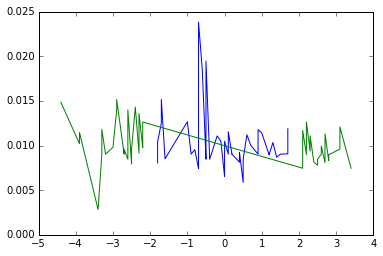

In [58]:


inspecPlotData = [(xx[0], xx[1]) for xx in inSpecErrors]
outspecPlotData = [(xx[0], xx[1]) for xx in outSpecErrors]

plt.plot(*zip(*sorted(inspecPlotData)))
plt.plot(*zip(*sorted(outspecPlotData)))

In [35]:
range??

In [8]:
input_kg = 20

kg_to_mv_factor = slope = 0.89

output_mv = input_kg*kg_to_mv_factor

programmed_slope = 0.95
ideal_mv_output = programmed_slope * input_kg

mv_to_kg_factor = 1/programmed_slope

output_kg = output_mv * mv_to_kg_factor

print output_kg
print abs(slope - programmed_slope) / programmed_slope
print abs(ideal_mv_output - output_mv) / ideal_mv_output
print abs(float(output_kg - input_kg)) / input_kg


14.1052631579
0.294736842105
0.294736842105
0.294736842105
